<a href="https://colab.research.google.com/github/Shubhankitsirvaiya/Airbnb/blob/main/Sales_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from xgboost import XGBRegressor
%matplotlib inline

In [3]:
df=pd.read_csv('/content/drive/MyDrive/TRAIN.csv')

In [4]:
df.head()

,ID,Store_id,Store_Type,Location_Type,Region_Code,Date,Holiday,Discount,#Order,Sales
0,T1000001,1,S1,L3,R1,2018-01-01,1,Yes,9,7011.84
1,T1000002,253,S4,L2,R1,2018-01-01,1,Yes,60,51789.12
2,T1000003,252,S3,L2,R1,2018-01-01,1,Yes,42,36868.20
3,T1000004,251,S2,L3,R1,2018-01-01,1,Yes,23,19715.16
4,T1000005,250,S2,L3,R4,2018-01-01,1,Yes,62,45614.52


In [5]:
df.shape

(188340, 10)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188340 entries, 0 to 188339
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   ID             188340 non-null  object 
 1   Store_id       188340 non-null  int64  
 2   Store_Type     188340 non-null  object 
 3   Location_Type  188340 non-null  object 
 4   Region_Code    188340 non-null  object 
 5   Date           188340 non-null  object 
 6   Holiday        188340 non-null  int64  
 7   Discount       188340 non-null  object 
 8   #Order         188340 non-null  int64  
 9   Sales          188340 non-null  float64
dtypes: float64(1), int64(3), object(6)
memory usage: 14.4+ MB


In [7]:
df.describe()

,Store_id,Holiday,#Order,Sales
count,188340.000000,188340.000000,188340.000000,188340.000000
mean,183.000000,0.131783,68.205692,42784.327982
std,105.366308,0.338256,30.467415,18456.708302
min,1.000000,0.000000,0.000000,0.000000
25%,92.000000,0.000000,48.000000,30426.000000
50%,183.000000,0.000000,63.000000,39678.000000
75%,274.000000,0.000000,82.000000,51909.000000
max,365.000000,1.000000,371.000000,247215.000000


Checking for null values

In [8]:
nulls=[]
for i in df.columns:
  nul=df[i].isnull().sum()
  nulls.append(nul)
pd.DataFrame({'columns':df.columns,'missing values':nulls})

,columns,missing values
0,ID,0
1,Store_id,0
2,Store_Type,0
3,Location_Type,0
4,Region_Code,0
5,Date,0
6,Holiday,0
7,Discount,0
8,#Order,0
9,Sales,0


No null values present

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

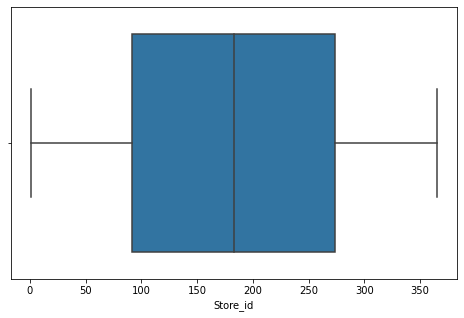

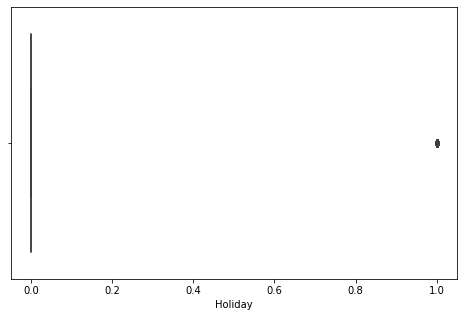

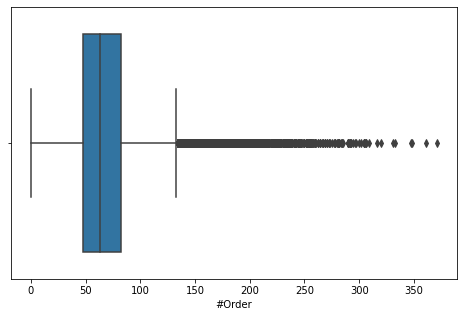

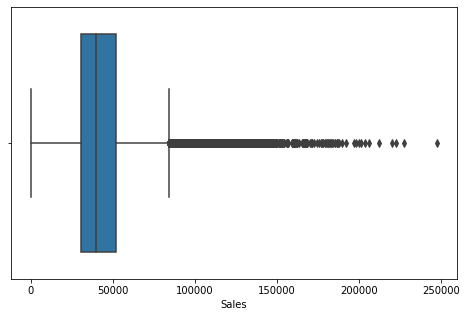

In [9]:
for i in df.describe().columns:
  plt.figure(figsize=(8,5))
  sns.boxplot(df[i])

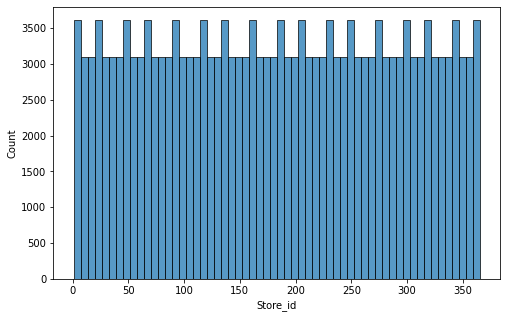

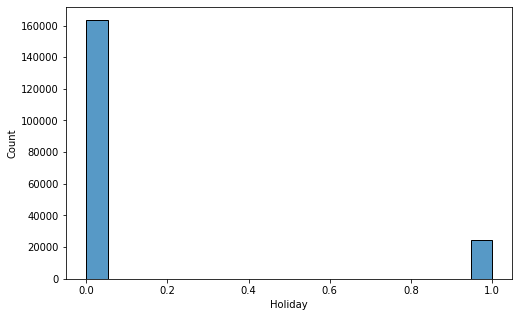

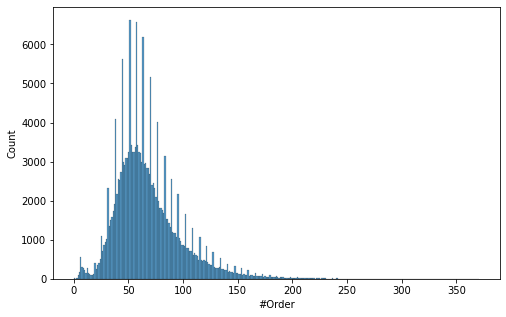

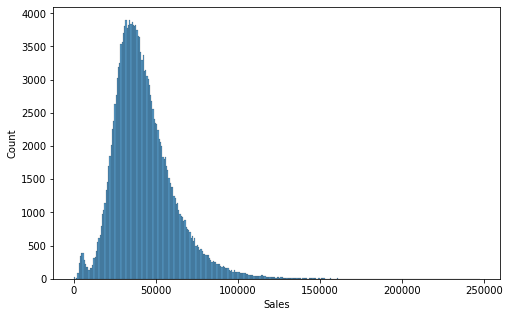

In [10]:
for i in df.describe().columns:
  plt.figure(figsize=(8,5))
  sns.histplot(df[i])

we have our target variable Rightly Skewed

In [11]:
df.head()

,ID,Store_id,Store_Type,Location_Type,Region_Code,Date,Holiday,Discount,#Order,Sales
0,T1000001,1,S1,L3,R1,2018-01-01,1,Yes,9,7011.84
1,T1000002,253,S4,L2,R1,2018-01-01,1,Yes,60,51789.12
2,T1000003,252,S3,L2,R1,2018-01-01,1,Yes,42,36868.20
3,T1000004,251,S2,L3,R1,2018-01-01,1,Yes,23,19715.16
4,T1000005,250,S2,L3,R4,2018-01-01,1,Yes,62,45614.52


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

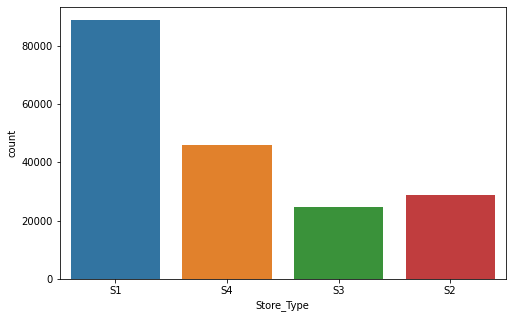

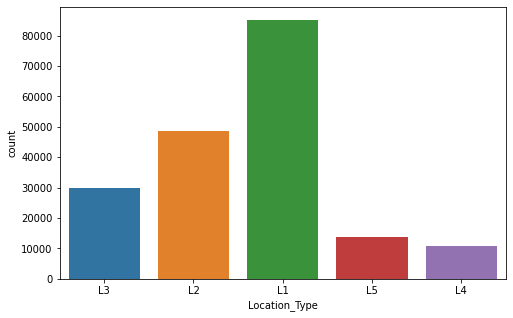

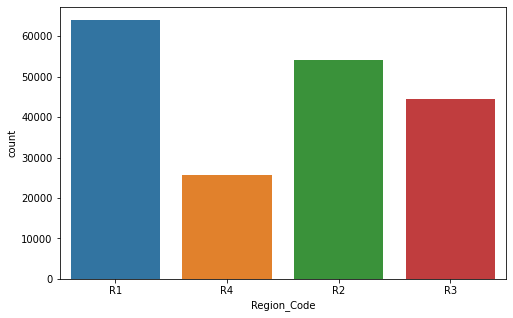

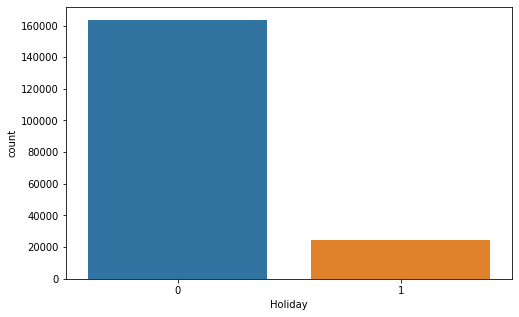

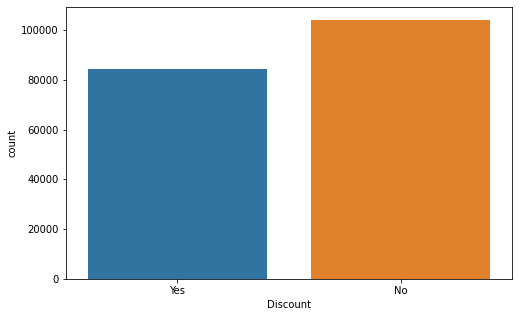

In [12]:
for i in df[['Store_Type','Location_Type','Region_Code','Holiday','Discount']]:
  plt.figure(figsize=(8,5))
  sns.countplot(df[i])

Region wise average Sales:

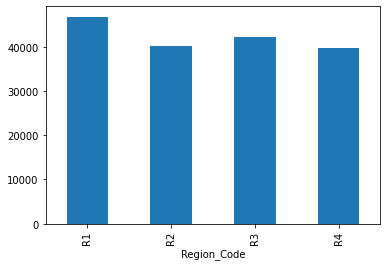

In [13]:
df.groupby('Region_Code')['Sales'].mean().plot(kind='bar')

Location Wise Analysis

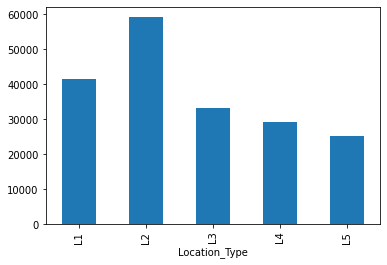

In [14]:
df.groupby('Location_Type')['Sales'].mean().plot(kind='bar')

Store type sales

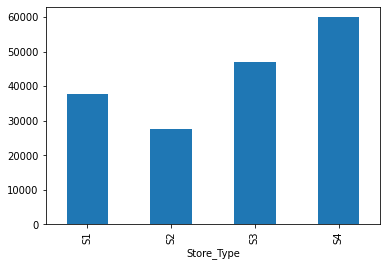

In [15]:
df.groupby('Store_Type')['Sales'].mean().plot(kind='bar')

In [16]:
def weekday_fet(x):
   return pd.to_datetime(x).weekday()

df['weekday']=df['Date'].apply(weekday_fet)

def month_fet(x):
   return pd.to_datetime(x).month
df['month']=df['Date'].apply(month_fet)

def day_fet(x):
   return pd.to_datetime(x).day
df['day']=df['Date'].apply(day_fet)


Weekday wise analysis

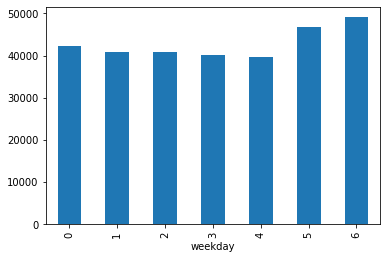

In [17]:
df.groupby('weekday')['Sales'].mean().plot(kind='bar')

We can see specifically on weekend

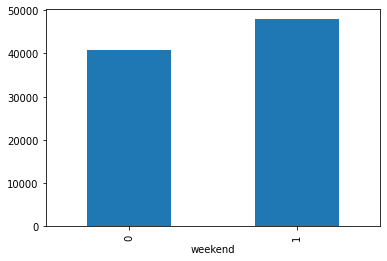

In [18]:
def isweekend(x):
  if x==5 or x==6:
    return 1
  else:
    return 0
df['weekend']=df['weekday'].apply(isweekend)
df.groupby('weekend')['Sales'].mean().plot(kind='bar')

In [19]:
df.head()

,ID,Store_id,Store_Type,Location_Type,Region_Code,Date,Holiday,Discount,#Order,Sales,weekday,month,day,weekend
0,T1000001,1,S1,L3,R1,2018-01-01,1,Yes,9,7011.84,0,1,1,0
1,T1000002,253,S4,L2,R1,2018-01-01,1,Yes,60,51789.12,0,1,1,0
2,T1000003,252,S3,L2,R1,2018-01-01,1,Yes,42,36868.20,0,1,1,0
3,T1000004,251,S2,L3,R1,2018-01-01,1,Yes,23,19715.16,0,1,1,0
4,T1000005,250,S2,L3,R4,2018-01-01,1,Yes,62,45614.52,0,1,1,0


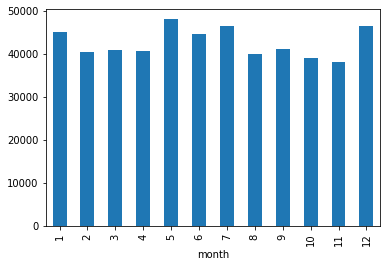

In [20]:
df.groupby('month')['Sales'].mean().plot(kind='bar')

we can see sales little high specifically on some Holiday season , but that is already covered by the Holiday feature

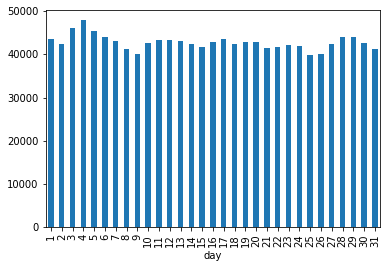

In [21]:
df.groupby('day')['Sales'].mean().plot(kind='bar')

although we can see a high , in start of month but that seem , significant

In [22]:
df.head()

,ID,Store_id,Store_Type,Location_Type,Region_Code,Date,Holiday,Discount,#Order,Sales,weekday,month,day,weekend
0,T1000001,1,S1,L3,R1,2018-01-01,1,Yes,9,7011.84,0,1,1,0
1,T1000002,253,S4,L2,R1,2018-01-01,1,Yes,60,51789.12,0,1,1,0
2,T1000003,252,S3,L2,R1,2018-01-01,1,Yes,42,36868.20,0,1,1,0
3,T1000004,251,S2,L3,R1,2018-01-01,1,Yes,23,19715.16,0,1,1,0
4,T1000005,250,S2,L3,R4,2018-01-01,1,Yes,62,45614.52,0,1,1,0


In [23]:
df.drop(['Date','ID','weekday','month','day',],axis=1,inplace=True)

In [24]:
df.drop('#Order',axis=1,inplace=True)

In [25]:
T=df[['Sales']]
Q1 = T.quantile(0.25)
Q3 = T.quantile(0.75)
IQR = Q3 - Q1
print("Outlier threshold of Appliances ",IQR)

dfOutlier=T.describe()
outlierSet=set()
for column in dfOutlier.columns:
    Q1 = dfOutlier[column]['25%']
    Q3 = dfOutlier[column]['75%']
    IQR = Q3 - Q1
    outlierDf= ( ((T[column] < (Q1 - 1.5 * IQR)) |(T[column] > (Q3 + 1.5 * IQR))) )
    outlierSet.update(set(outlierDf[outlierDf==True].index))
        

df.drop(outlierSet, inplace=True, axis=0)

Outlier threshold of Appliances  Sales    21483.0
dtype: float64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

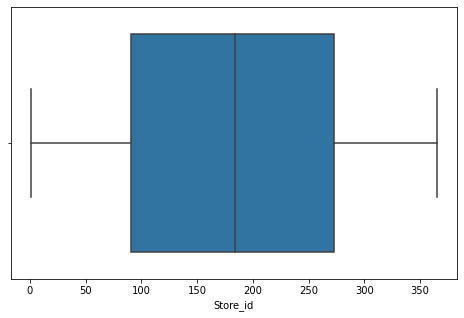

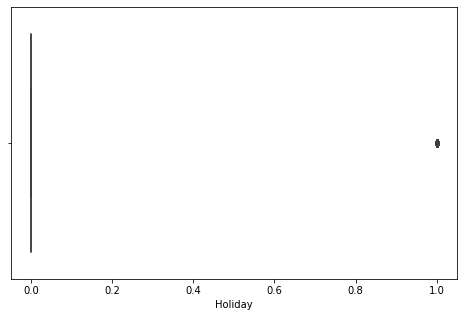

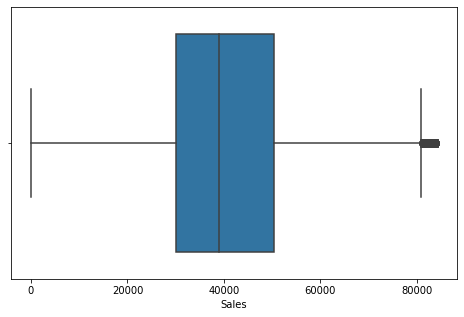

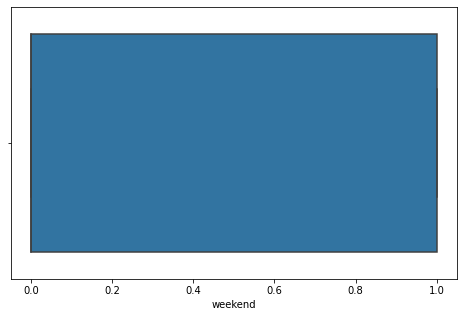

In [26]:
for i in df.describe().columns:
  plt.figure(figsize=(8,5))
  sns.boxplot(df[i])

In [27]:
df_dum=pd.get_dummies(df,columns=['Store_Type','Location_Type','Region_Code','Discount','Store_id'])

In [28]:
df_dum.head()

,Holiday,Sales,weekend,Store_Type_S1,Store_Type_S2,Store_Type_S3,Store_Type_S4,Location_Type_L1,Location_Type_L2,Location_Type_L3,Location_Type_L4,Location_Type_L5,Region_Code_R1,Region_Code_R2,Region_Code_R3,Region_Code_R4,Discount_No,Discount_Yes,Store_id_1,Store_id_2,Store_id_3,Store_id_4,Store_id_5,Store_id_6,Store_id_7,Store_id_8,Store_id_9,Store_id_10,Store_id_11,Store_id_12,Store_id_13,Store_id_14,Store_id_15,Store_id_16,Store_id_17,Store_id_18,Store_id_19,Store_id_20,Store_id_21,Store_id_22,...,Store_id_326,Store_id_327,Store_id_328,Store_id_329,Store_id_330,Store_id_331,Store_id_332,Store_id_333,Store_id_334,Store_id_335,Store_id_336,Store_id_337,Store_id_338,Store_id_339,Store_id_340,Store_id_341,Store_id_342,Store_id_343,Store_id_344,Store_id_345,Store_id_346,Store_id_347,Store_id_348,Store_id_349,Store_id_350,Store_id_351,Store_id_352,Store_id_353,Store_id_354,Store_id_355,Store_id_356,Store_id_357,Store_id_358,Store_id_359,Store_id_360,Store_id_361,Store_id_362,Store_id_363,Store_id_364,Store_id_365
0,1,7011.84,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,51789.12,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,36868.20,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,19715.16,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,45614.52,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [29]:
df_dum.shape

(182497, 383)

In [30]:
df_dum=df_dum[df_dum['Sales']>0]

In [31]:
X=df_dum.drop('Sales',axis=1)
y=np.log10(df_dum['Sales'])

In [32]:
X.shape

(182478, 382)

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_log_error,mean_squared_error
from sklearn.neighbors import NearestNeighbors
from sklearn.ensemble import RandomForestRegressor

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42,)

In [ ]:
'''model_dec=DecisionTreeRegressor()
model_dec.fit(X_train,y_train)
y_train_pred=model_dec.predict(X_train)
print(mean_squared_log_error(y_train,y_train_pred))
print(mean_squared_error(y_train,y_train_pred))
y_pred=model_dec.predict(X_test)
print(mean_squared_log_error(y_test,y_pred))
print(mean_squared_error(y_test,y_pred))'''

0.0034256451697869867
6648019.729340711


Random forest

In [48]:
model_ran=RandomForestRegressor(n_estimators=100,criterion='mse')
model_ran.fit(X_train,y_train)


77.90762230864077
1751917686.105258
77.95157961434163
1756006196.845281


In [49]:
y_train_pred=model_ran.predict(X_train)
print(mean_squared_log_error(10**y_train,10**y_train_pred))
print(mean_squared_error(10**y_train,10**y_train_pred))

y_pred=model_ran.predict(X_test)
print(mean_squared_log_error(10**y_test,10**y_pred))
print(mean_squared_error(10**y_test,10**y_pred))

0.0778888550252495
79948002.59559633
0.08190364723882507
83111126.48714192


PCA

In [ ]:
'''from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X=scaler.fit_transform(X)
from sklearn.decomposition import PCA
pca = PCA(n_components=200)
pca.fit(X)
X_pca=pca.transform(X)
X_train,X_test,y_train,y_test=train_test_split(X_pca, y, test_size=0.2, random_state=0)
model_ran=RandomForestRegressor(n_estimators=100)
model_ran.fit(X_train,np.log10(y_train))
y_train_pred=model_ran.predict(X_train)
print(mean_squared_log_error(y_train,10**y_train_pred))
print(mean_squared_error(y_train,10**y_train_pred))

y_pred=model_ran.predict(X_test)
print(mean_squared_log_error(y_test,10**y_pred))
print(mean_squared_error(y_test,10**y_pred))'''

'from sklearn.preprocessing import StandardScaler\nscaler=StandardScaler()\nX=scaler.fit_transform(X)\nfrom sklearn.decomposition import PCA\npca = PCA(n_components=200)\npca.fit(X)\nX_pca=pca.transform(X)\nX_train,X_test,y_train,y_test=train_test_split(X_pca, y, test_size=0.2, random_state=0)\nmodel_ran=RandomForestRegressor(n_estimators=100)\nmodel_ran.fit(X_train,np.log10(y_train))\ny_train_pred=model_ran.predict(X_train)\nprint(mean_squared_log_error(y_train,10**y_train_pred))\nprint(mean_squared_error(y_train,10**y_train_pred))\n\ny_pred=model_ran.predict(X_test)\nprint(mean_squared_log_error(y_test,10**y_pred))\nprint(mean_squared_error(y_test,10**y_pred))'

XGB

In [40]:
from xgboost import XGBRegressor
model_xgb=XGBRegressor()
model_xgb.fit(X_train,y_train)

y_train_pred=model_xgb.predict(X_train)
print(mean_squared_log_error(10**y_train,10**y_train_pred))
print(mean_squared_error(10**y_train,10**y_train_pred))

y_pred=model_xgb.predict(X_test)
print(mean_squared_log_error(10**y_test,10**y_pred))
print(mean_squared_error(10**y_test,10**y_pred))


[11:17:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
0.0864337372071148
93080577.80631192
0.08426125693059686
91408814.09437098


GBM

In [38]:
from sklearn.ensemble import GradientBoostingRegressor
model_gbm=GradientBoostingRegressor()
model_gbm.fit(X_train,y_train)
y_train_pred=model_gbm.predict(X_train)
print(mean_squared_log_error(10**y_train,10**y_train_pred))
print(mean_squared_error(10**y_train,10**y_train_pred))

y_pred=model_gbm.predict(X_test)
print(mean_squared_log_error(10**y_test,10**y_pred))
print(mean_squared_error(10**y_test,10**y_pred))


0.08643604612032316
93067378.21034484
0.08420675276220399
91342475.40644863


Decision tree

In [46]:

model_dec=DecisionTreeRegressor(criterion='friedman_mse')

model_dec.fit(X_train,y_train)
y_train_pred=model_dec.predict(X_train)
print(mean_squared_log_error(10**y_train,10**y_train_pred))
print(mean_squared_error(10**y_train,10**y_train_pred))

y_pred=model_dec.predict(X_test)
print(mean_squared_log_error(10**y_test,10**y_pred))
print(mean_squared_error(10**y_test,10**y_pred))

0.07786153636958645
79934887.81721146
0.08189888392065195
83148532.72721553


In [41]:
from sklearn.model_selection import GridSearchCV 

In [47]:
parameters = {'max_depth':range(3,20)}
grid = GridSearchCV(model_dec,n_jobs=2,cv=5, verbose = 10,scoring='neg_mean_squared_log_error',param_grid=parameters) 

grid.fit(X_train,y_train)
y_train_pred=grid.predict(X_train)
print(mean_squared_log_error(10**y_train,10**y_train_pred))
print(mean_squared_error(10**y_train,10**y_train_pred))

y_pred=grid.predict(X_test)
print(mean_squared_log_error(10**y_test,10**y_pred))
print(mean_squared_error(10**y_test,10**y_pred))

Fitting 5 folds for each of 17 candidates, totalling 85 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:    3.7s
[Parallel(n_jobs=2)]: Done   4 tasks      | elapsed:    5.9s
[Parallel(n_jobs=2)]: Done   9 tasks      | elapsed:   12.2s
[Parallel(n_jobs=2)]: Done  14 tasks      | elapsed:   17.4s
[Parallel(n_jobs=2)]: Done  21 tasks      | elapsed:   27.9s
[Parallel(n_jobs=2)]: Done  28 tasks      | elapsed:   37.1s
[Parallel(n_jobs=2)]: Done  37 tasks      | elapsed:   52.2s
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:  1.1min
[Parallel(n_jobs=2)]: Done  57 tasks      | elapsed:  1.4min
[Parallel(n_jobs=2)]: Done  68 tasks      | elapsed:  1.7min
[Parallel(n_jobs=2)]: Done  81 tasks      | elapsed:  2.2min
[Parallel(n_jobs=2)]: Done  85 out of  85 | elapsed:  2.3min finished


0.07988194657308555
83102781.99610785
0.08248418284187015
85373783.0386033


In [46]:
import sklearn
sorted(sklearn.metrics.SCORERS.keys()) 

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'roc_auc_ovo',
 'roc_auc_ovo_weighted',
 'roc_auc_ovr',
 'roc_auc_ovr_weighted',
 'v_measure_score']

In [38]:
from sklearn.ensemble import StackingRegressor

estimators = [
     ('xgb', XGBRegressor()),
    ('Dec', DecisionTreeRegressor()),
    ('random',RandomForestRegressor())
 ]
reg = StackingRegressor(estimators=estimators,
    final_estimator=RandomForestRegressor(n_estimators=100,
                                          random_state=42),cv=5)

reg.fit(X_train, y_train)

[14:28:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:34:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:36:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:37:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:39:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:40:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


StackingRegressor(cv=5,
                  estimators=[('xgb',
                               XGBRegressor(base_score=0.5, booster='gbtree',
                                            colsample_bylevel=1,
                                            colsample_bynode=1,
                                            colsample_bytree=1, gamma=0,
                                            importance_type='gain',
                                            learning_rate=0.1, max_delta_step=0,
                                            max_depth=3, min_child_weight=1,
                                            missing=None, n_estimators=100,
                                            n_jobs=1, nthread=None,
                                            objective='reg:linear',
                                            random_state=0, reg_alpha=0,
                                            reg_la...
                  final_estimator=RandomForestRegressor(bootstrap=True,
                     

In [39]:
y_train_pred=reg.predict(X_train)
print(mean_squared_log_error(10**y_train,10**y_train_pred))
print(mean_squared_error(10**y_train,10**y_train_pred))

y_pred=reg.predict(X_test)
print(mean_squared_log_error(10**y_test,10**y_pred))
print(mean_squared_error(10**y_test,10**y_pred))

0.08542744848056472
86708856.82317607
0.08268743134312254
85868829.15306161


In [ ]:
sta

In [56]:
stacking.fit(X_train, y_train)
y_train_pred=stacking.predict(X_train)
print(mean_squared_log_error(10**y_train,10**y_train_pred))
print(mean_squared_error(10**y_train,10**y_train_pred))

y_pred=stacking.predict(X_test)
print(mean_squared_log_error(10**y_test,10**y_pred))
print(mean_squared_error(10**y_test,10**y_pred))

TypeError: ignored

In [40]:
df_test=pd.read_csv('/content/drive/MyDrive/TEST_FINAL.csv')
df_test

,ID,Store_id,Store_Type,Location_Type,Region_Code,Date,Holiday,Discount
0,T1188341,171,S4,L2,R3,2019-06-01,0,No
1,T1188342,172,S1,L1,R1,2019-06-01,0,No
2,T1188343,173,S4,L2,R1,2019-06-01,0,No
3,T1188344,174,S1,L1,R4,2019-06-01,0,No
4,T1188345,170,S1,L1,R2,2019-06-01,0,No
...,...,...,...,...,...,...,...,...
22260,T1210601,186,S2,L5,R2,2019-07-31,0,No
22261,T1210602,11,S4,L2,R1,2019-07-31,0,No
22262,T1210603,185,S1,L1,R3,2019-07-31,0,Yes
22263,T1210604,69,S1,L1,R4,2019-07-31,0,No


In [41]:
df_test['weekday']=df_test['Date'].apply(weekday_fet)
def isweekend(x):
  if x==5 or x==6:
    return 1
  else:
    return 0
df_test['weekend']=df_test['weekday'].apply(isweekend)
df_test.drop('weekday',axis=1,inplace=True)

In [42]:
df_test_dum=pd.get_dummies(df_test,columns=['Store_Type','Location_Type','Region_Code','Discount','Store_id'])
df_test_dum.drop(['ID','Date'],axis=1,inplace=True)

In [43]:
df_test_dum.shape

(22265, 382)

In [44]:
df_test_dum.head()

,Holiday,weekend,Store_Type_S1,Store_Type_S2,Store_Type_S3,Store_Type_S4,Location_Type_L1,Location_Type_L2,Location_Type_L3,Location_Type_L4,Location_Type_L5,Region_Code_R1,Region_Code_R2,Region_Code_R3,Region_Code_R4,Discount_No,Discount_Yes,Store_id_1,Store_id_2,Store_id_3,Store_id_4,Store_id_5,Store_id_6,Store_id_7,Store_id_8,Store_id_9,Store_id_10,Store_id_11,Store_id_12,Store_id_13,Store_id_14,Store_id_15,Store_id_16,Store_id_17,Store_id_18,Store_id_19,Store_id_20,Store_id_21,Store_id_22,Store_id_23,...,Store_id_326,Store_id_327,Store_id_328,Store_id_329,Store_id_330,Store_id_331,Store_id_332,Store_id_333,Store_id_334,Store_id_335,Store_id_336,Store_id_337,Store_id_338,Store_id_339,Store_id_340,Store_id_341,Store_id_342,Store_id_343,Store_id_344,Store_id_345,Store_id_346,Store_id_347,Store_id_348,Store_id_349,Store_id_350,Store_id_351,Store_id_352,Store_id_353,Store_id_354,Store_id_355,Store_id_356,Store_id_357,Store_id_358,Store_id_359,Store_id_360,Store_id_361,Store_id_362,Store_id_363,Store_id_364,Store_id_365
0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,1,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,1,1,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,1,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [47]:
y_ans=model_dec.predict(df_test_dum)
y_inv_ans=10**y_ans

In [49]:
res=pd.DataFrame({'ID':df_test['ID'],'Sales':y_inv_ans})

In [50]:
res.to_csv('/content/drive/MyDrive/file7.csv', index=False)

In [51]:
res

,ID,Sales
0,T1188341,51018.435947
1,T1188342,39476.609161
2,T1188343,72162.633166
3,T1188344,36946.808880
4,T1188345,39319.177127
...,...,...
22260,T1210601,18769.760300
22261,T1210602,52294.945800
22262,T1210603,45664.445378
22263,T1210604,30074.555790
